In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import torch

from torchdiffeq import odeint

from pideq.four_tanks import four_tanks

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

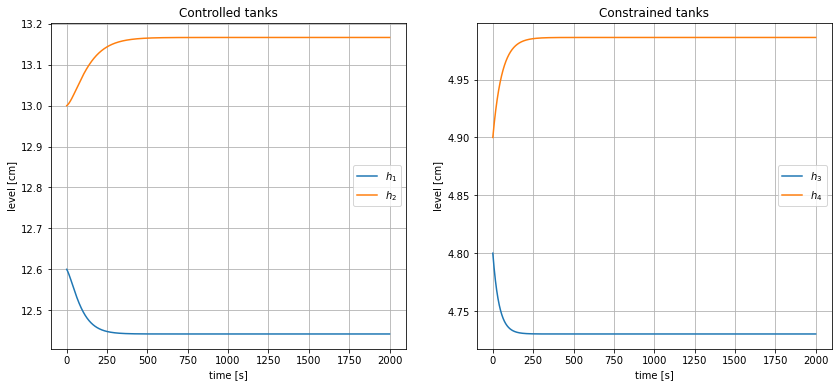

In [5]:
y0 = torch.zeros(4,1)
y0[0,0] = 12.6
y0[1,0] = 13.0
y0[2,0] = 4.8
y0[3,0] = 4.9

u0 = torch.zeros(2,1)
u0[0,0] = 3.15
u0[1,0] = 3.15

dt = 1.
N = 2000

y = odeint(lambda t, y: four_tanks(y,u0), y0, torch.Tensor([i * dt for i in range(N+1)]), method='rk4')

y_ = y.detach().numpy()

time = [dt * k for k in range(N+1)]

fig, axs = plt.subplots(1,2)
fig.set_size_inches(14,6)

axs[0].set_title('Controlled tanks')
axs[0].plot(time, y_[:,0], label='$h_1$')
axs[0].plot(time, y_[:,1], label='$h_2$')
axs[0].set_ylabel('level [cm]')
axs[0].set_xlabel('time [s]')
axs[0].legend()
axs[0].grid()

axs[1].set_title('Constrained tanks')
axs[1].plot(time, y_[:,2], label='$h_3$')
axs[1].plot(time, y_[:,3], label='$h_4$')
axs[1].set_ylabel('level [cm]')
axs[1].set_xlabel('time [s]')
axs[1].legend()
axs[1].grid()

plt.show()